# Convulutional AutoEncoders for Image Classifcation

## Importing Libraries

In [140]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Reshape    # Here UpSampling2D is the opposite of MaxPooling2D. Reshape it used to convert flattened img to matrix again 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input, AveragePooling2D
import numpy as np
import matplotlib.pyplot as plt
tf.__version__



'2.16.1'

## Loading the Dataset

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 129s 1us/step


In [5]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

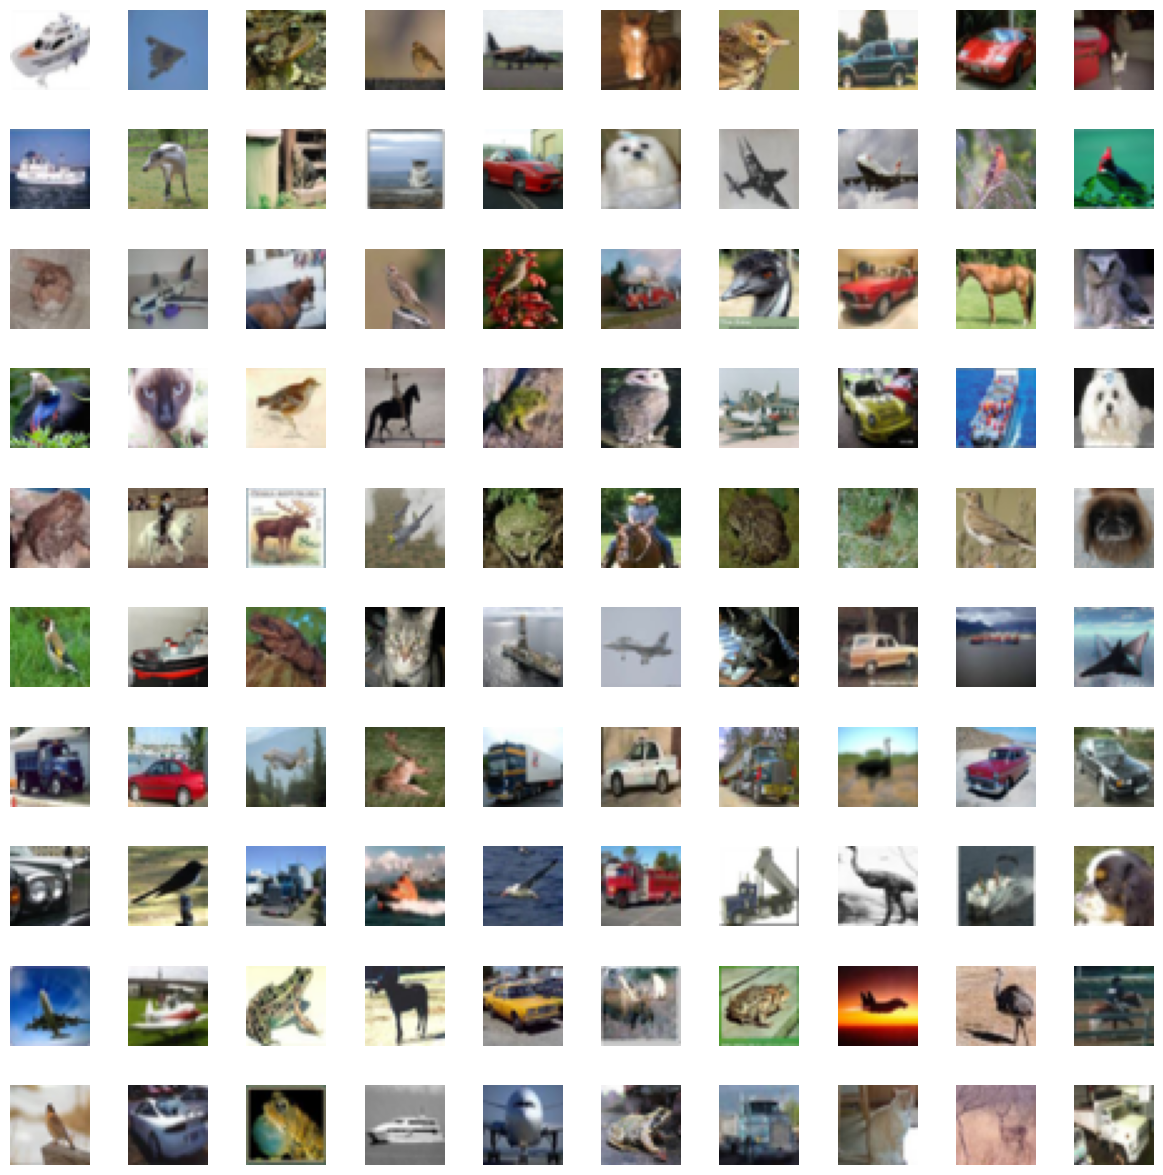

In [11]:
width, height = 10, 10
fig, axis = plt.subplots(height, width, figsize=(15, 15))   
axis = axis.ravel()

for i in np.arange(0, width * height):
    index = np.random.randint(0, X_train.shape[0]-1)
    axis[i].imshow(X_train[index])
    axis[i].axis('off') 
plt.subplots_adjust(hspace=0.5)


## Preprocessing the Image

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In Linear AutoEncoder, we need to pass each pixel in the form of a vector to each neuron of the autoencoder. But in convolutional autoencoders, we can simply pass the image in grayscale\rgb format. Since above shape does not have the number for grayscale, so we reshape it

In [15]:
X_train[0].shape, X_test[0].shape

((32, 32, 3), (32, 32, 3))

## Building and Training the Convolutional AutoEncoder

In [141]:
# My Structure
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2, 2)))

autoencoder.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

# autoencoder.add(Conv2D(filters=32, kernel_size=(1, 1), activation='relu', padding='same'))

autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2, 2), padding='same')) # Encoded Image of 128 pixels in form of vector

# autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', name='encoded_image')) # Encoded Image, size 128 pixels
# autoencoder.add(BatchNormalization())

# # Decoder
# autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
# autoencoder.add(BatchNormalization())
# autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size=(2, 2)))

# autoencoder.add(Conv2D(filters=32, kernel_size=(1, 1), activation='relu', padding='same'))

autoencoder.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Dropout(0.2))
autoencoder.add(Conv2D(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same'))

autoencoder.summary() 

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_216 (Conv2D)             │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_217 (Conv2D)             │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 8, 8, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_218 (Conv2D)             │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_219 (Conv2D)             │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 4, 4, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_60 (UpSampling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_220 (Conv2D)             │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_61 (UpSampling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_221 (Conv2D)             │ (None, 16, 16, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,347 (130.26 KB)

 Trainable params: 33,027 (129.01 KB)

 Non-trainable params: 320 (1.25 KB)

Why Use Sigmoid and Binary Crossentropy?

Sigmoid Activation:
    The sigmoid activation function ensures that the output values are within the range [0,1][0,1], making them interpretable as probabilities.
    
Binary Crossentropy Loss:
    The binary_crossentropy loss function calculates the difference between the predicted probability (output of the sigmoid function) and the true target value (normalized pixel value).
    It is particularly effective for scenarios where the output can be interpreted as a probability, and it is sensitive to small differences in predicted values, making it suitable for image reconstruction tasks.

In [123]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5260 - loss: 0.6106
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6696 - loss: 0.5784
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7053 - loss: 0.5748
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7130 - loss: 0.5730
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7193 - loss: 0.5723
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7256 - loss: 0.5705
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7264 - loss: 0.5698
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7309 - loss: 0.5699
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7348 - loss: 0.5700
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7326 - loss: 0.5685
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7351 - loss: 0.5685
Epoch 12

In [125]:
# Encoder
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('encoded_image').output)


In [126]:
encoder.summary()   

Model: "functional_503"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_208 (Conv2D)             │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_209 (Conv2D)             │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_210 (Conv2D)             │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 4, 4, 16)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_image (Conv2D)          │ (None, 4, 4, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,488 (103.47 KB)

 Trainable params: 26,264 (102.59 KB)

 Non-trainable params: 224 (896.00 B)

In [127]:
coded_test_images = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [128]:
coded_test_images.shape

(10000, 4, 4, 8)

In [129]:
coded_test_images[0]

array([[[3.5652766, 5.5633144, 4.328044 , 6.1769686, 8.703814 ,
         6.081408 , 4.5331497, 5.7415442],
        [3.449613 , 5.4428434, 4.8539   , 5.6232758, 7.5552516,
         6.1725926, 5.184559 , 5.011782 ],
        [3.4811952, 4.2969837, 4.4536433, 5.4729166, 6.352851 ,
         5.6505384, 5.606616 , 6.1447997],
        [2.8578224, 4.802647 , 4.290549 , 5.9463825, 6.815731 ,
         5.7100315, 4.9276395, 6.0908427]],

       [[4.518717 , 6.126212 , 5.339463 , 6.301288 , 8.228845 ,
         4.5850997, 7.575863 , 5.5319777],
        [4.7869377, 5.7086086, 6.305758 , 6.667389 , 9.194966 ,
         4.2584915, 7.3542194, 4.7197113],
        [4.424625 , 5.359429 , 6.5123863, 5.363891 , 6.898149 ,
         4.9270425, 6.2800097, 6.412334 ],
        [3.7811866, 4.812128 , 4.740286 , 6.211628 , 7.2332726,
         4.006373 , 5.312928 , 6.676069 ]],

       [[4.9878216, 6.208091 , 4.5609303, 7.239042 , 9.068715 ,
         4.4813633, 7.489548 , 4.028105 ],
        [4.7762346, 6.9199333, 6.

In [130]:
X_test[0].shape

(32, 32, 3)

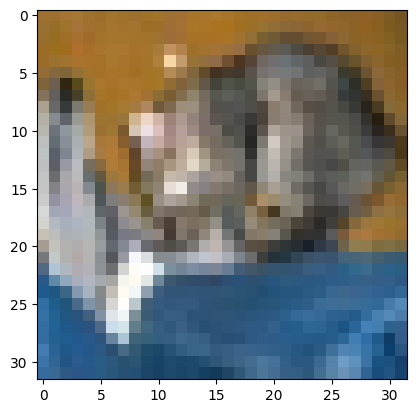

In [131]:
plt.imshow(X_test[0]);

In [132]:
coded_test_images[0].reshape(16, 8, 1).shape

(16, 8, 1)

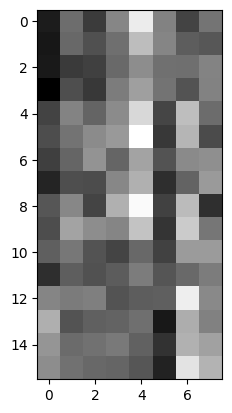

In [133]:
plt.imshow(coded_test_images[0].reshape(16, 8, 1), cmap='gray');

In [134]:
decoded_test_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [135]:
decoded_test_images.shape

(10000, 32, 32, 3)

In [136]:
decoded_test_images[0].shape

(32, 32, 3)

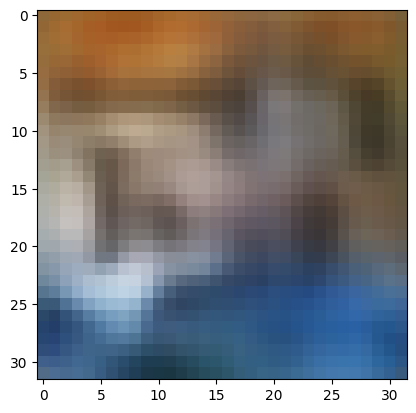

In [137]:
plt.imshow(decoded_test_images[0]);

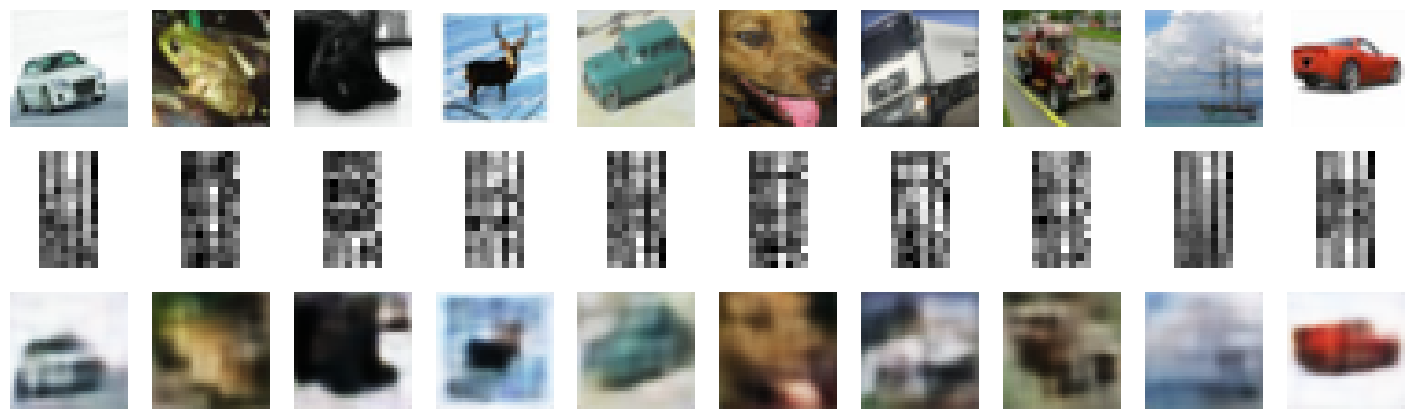

In [138]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size=n_images)

plt.figure(figsize=(18, 18))

for i, image_index in enumerate(test_images):
    # Original Image
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_test[image_index], cmap='gray')
    plt.axis('off')

    # Coded Image
    ax = plt.subplot(10, 10, i + 1 + n_images)
    plt.imshow(coded_test_images[image_index].reshape(16, 8), cmap='gray')
    plt.axis('off')

    # Coded Image]
    ax = plt.subplot(10, 10, i + 1 + n_images * 2)
    plt.imshow(decoded_test_images[image_index], cmap='gray')
    plt.axis('off')
